In [69]:
import os
import json

import collections

In [59]:
DATA_DIR = os.path.join('data', 'boxofficemojo')


In [60]:
movies=[]
movie={}

for file in os.listdir(DATA_DIR):
    target_file_path = os.path.join(DATA_DIR, file)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
    movies.append(movie)

In [61]:
len(movies)

3728

In [102]:
movie

{u'alt_title': u'Zoom (2006)',
 u'director': u'Peter Hewitt',
 u'domestic_gross': 11989328,
 u'mojo_slug': u'zoom',
 u'opening_per_theater': 1803,
 u'opening_weekend_take': 4510408,
 u'production_budget': None,
 u'release_date_limited': None,
 u'release_date_wide': u'2006-08-11',
 u'title': u'Zoom',
 u'widest_release': 2501,
 u'worldwide_gross': 12506188,
 u'year': 2006}

In [106]:
movie_years=[]
for movie in movies:
    movie_years.append(movie['year'])
    cnt=collections.Counter()
for year in movie_years:
    cnt[year] += 1
len(cnt.keys())  

61

In [86]:
    from pprint import pprint
    pprint(cnt)

Counter({2013: 308, 2014: 280, 2011: 264, 2012: 257, 2010: 209, 2008: 194, 2009: 192, 2007: 190, 2006: 184, 2005: 164, 2004: 161, 2003: 146, 2002: 132, 2001: 108, 1999: 106, 2000: 99, 1998: 84, 1997: 74, 2015: 53, 1996: 52, 1995: 51, 1993: 39, 1988: 31, 1994: 30, 1989: 29, 1992: 28, 1987: 27, 1990: 24, 1991: 24, 1986: 21, 1983: 19, 1982: 18, 1984: 17, 1980: 14, 1985: 13, 1981: 12, 1979: 9, None: 7, 1970: 6, 1976: 6, 1978: 6, 1969: 4, 1972: 4, 1974: 4, 1977: 4, 1951: 3, 1975: 3, 1956: 2, 1967: 2, 1968: 2, 1971: 2, 1933: 1, 1936: 1, 1937: 1, 1940: 1, 1946: 1, 1950: 1, 1953: 1, 1959: 1, 1960: 1, 1964: 1})


(array([  4.00000000e+00,   1.00000000e+00,   7.00000000e+00,
          3.00000000e+00,   2.00000000e+01,   7.60000000e+01,
          1.81000000e+02,   3.82000000e+02,   1.10000000e+03,
          1.94700000e+03]),
 array([ 1933. ,  1941.2,  1949.4,  1957.6,  1965.8,  1974. ,  1982.2,
         1990.4,  1998.6,  2006.8,  2015. ]),
 <a list of 10 Patch objects>)

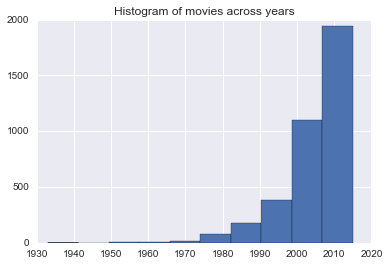

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
while None in movie_years:
    movie_years.remove(None)
plt.title('Histogram of movies across years')
plt.hist(movie_years)

In [120]:
import math
domestic_gross=[]
for movie in movies:
    if movie['domestic_gross'] is not None:
        domestic_gross.append(math.log((movie['domestic_gross'])))

(array([    3.,    15.,    90.,   215.,   353.,   410.,   449.,   783.,
         1188.,   147.]),
 array([  4.27666612,   5.89394918,   7.51123223,   9.12851529,
         10.74579835,  12.36308141,  13.98036447,  15.59764752,
         17.21493058,  18.83221364,  20.4494967 ]),
 <a list of 10 Patch objects>)

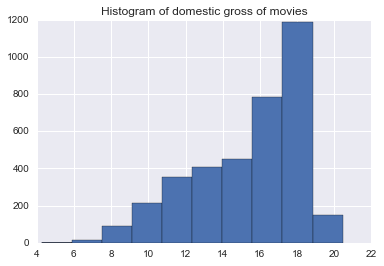

In [121]:
plt.title('Histogram of domestic gross of movies')
plt.hist(domestic_gross)

(array([  6.66000000e+02,   1.87400000e+03,   8.71000000e+02,
          2.12000000e+02,   8.00000000e+01,   1.80000000e+01,
          3.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  0. ,   8.2,  16.4,  24.6,  32.8,  41. ,  49.2,  57.4,  65.6,
         73.8,  82. ]),
 <a list of 10 Patch objects>)

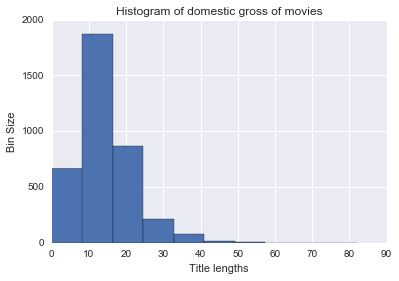

In [123]:
import math
title_lengths=[]
for movie in movies:
    title_lengths.append(len(movie['title']))
plt.title('Histogram of domestic gross of movies')
plt.xlabel('Title lengths')
plt.ylabel('Bin Size')
plt.hist(title_lengths)

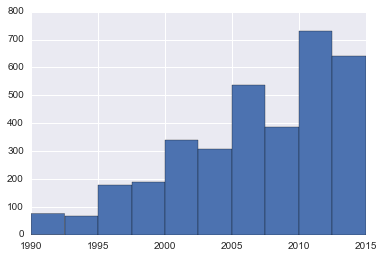

In [126]:
import pandas as pd
movies_df = pd.DataFrame(movies)

recent_movies = movies_df[movies_df['year']>=1990]

recent_movies['year'].hist()

(0, 250000000)

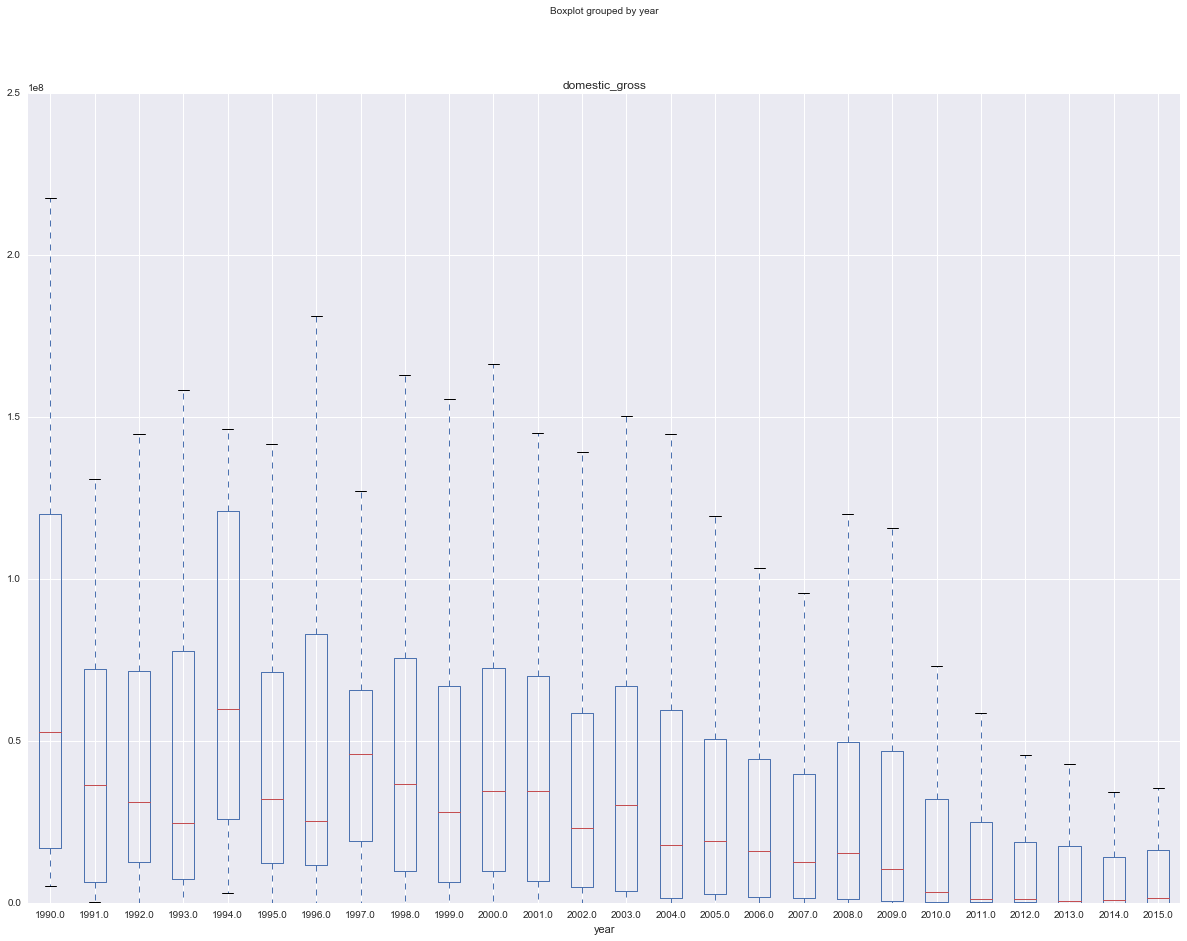

In [158]:

recent_movies.boxplot(column= 'domestic_gross',by='year',figsize =(20,15)).set_ylim(0,250000000)

In [135]:
movies_df.head()


,alt_title,director,domestic_gross,mojo_slug,opening_per_theater,opening_weekend_take,production_budget,release_date_limited,release_date_wide,title,widest_release,worldwide_gross,year
0,"10,000 B.C. (2008)",Roland Emmerich,94784201.0,10000bc,10518.0,35867488.0,105000000.0,None,2008-03-07,"10,000 B.C.",3454.0,269784201.0,2008.0
1,102 Dalmatians (2000),None,66957026.0,102dalmatians,7353.0,19883351.0,85000000.0,None,2000-11-22,102 Dalmatians,2704.0,183611771.0,2000.0
2,10 Things I Hate About You (1999),None,38178166.0,10thingsihateaboutyou,3668.0,8330681.0,30000000.0,None,1999-03-31,10 Things I Hate About You,2311.0,53478166.0,1999.0
3,10 Years (2012),Jamie Linden,203373.0,10years,7569.0,22707.0,NaN,None,2012-09-14,10 Years,63.0,203373.0,2012.0
4,11 Flowers (2013),None,9213.0,11flowers,1758.0,3516.0,NaN,None,2013-02-22,11 Flowers,2.0,NaN,2013.0


In [136]:
movies_df.describe()

,domestic_gross,opening_per_theater,opening_weekend_take,production_budget,widest_release,worldwide_gross,year
count,3.653000e+03,3548.000000,3.548000e+03,1.591000e+03,3576.000000,2.821000e+03,3721.000000
mean,3.587710e+07,7769.070744,8.919290e+06,4.594223e+07,1359.910794,9.117943e+07,2004.740124
std,5.660351e+07,8251.101404,1.403204e+07,4.056849e+07,1293.817347,1.489563e+08,9.127232
min,7.200000e+01,72.000000,7.200000e+01,2.200000e+02,1.000000,7.200000e+01,1933.000000
25%,6.353250e+05,3212.000000,4.748775e+04,1.675000e+07,52.000000,5.710236e+06,2001.000000
50%,1.323532e+07,5520.500000,3.334686e+06,3.500000e+07,1074.500000,3.554776e+07,2007.000000
75%,4.966253e+07,9463.500000,1.268750e+07,6.500000e+07,2584.250000,1.166729e+08,2011.000000
max,7.605076e+08,204230.000000,1.741446e+08,2.150000e+08,4468.000000,2.787965e+09,2015.000000


In [163]:
movies_dropped=movies_df[pd.notnull(movies_df.production_budget)]

In [164]:
len(movies_dropped)

1591

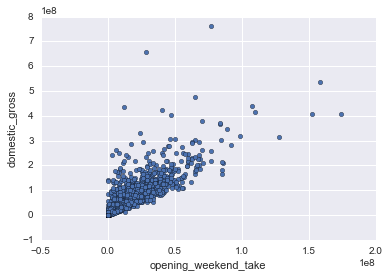

In [181]:
movies_df.plot.scatter('opening_weekend_take','domestic_gross' )

In [187]:
len(removednan)

3548

In [188]:
movies_df.plot.scatter('opening_weekend_take','domestic_gross' )


movie_open_domestic=pd.DataFrame()
movie_open_domestic['domestic_gross']=movies_df['domestic_gross']
movie_open_domestic['opening_weekend_take']=movies_df['opening_weekend_take']
length_total=len(movie_open_domestic)
length_nonan=len(movie_open_domestic.dropna())
num_losing=length_total-length_nonan



180

In [195]:

movie_open_domestic=pd.DataFrame()
movie_open_domestic['domestic_gross']=movies_df['domestic_gross']
movie_open_domestic['opening_weekend_take']=movies_df['opening_weekend_take']
df=movie_open_domestic.dropna().copy()
import statsmodels.api as sm

Y = df.domestic_gross
X = sm.add_constant(df.opening_weekend_take)

linmodel = sm.OLS(Y,X).fit()

In [196]:
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         domestic_gross   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     9522.
Date:                Wed, 11 May 2016   Prob (F-statistic):               0.00
Time:                        10:57:03   Log-Likelihood:                -66088.
No. Observations:                3548   AIC:                         1.322e+05
Df Residuals:                    3546   BIC:                         1.322e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                 5.397e+06   5.92e+05      9.120      0.000      4.24e+06  6.56e+06
opening_weekend_take     3.4734      0.036     97.581      0.000         3.404     3.543
==============================================================================
Omnibus:                     4177.673   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           873313.507
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      78.946   Cond. No.                     1.97e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

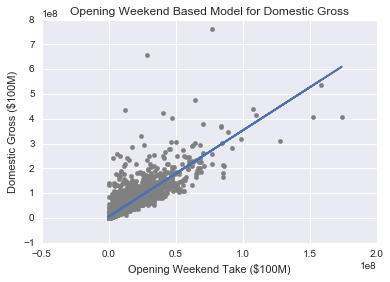

In [230]:
predicted_gross = linmodel.predict(X)
plt.scatter(df.opening_weekend_take, df.domestic_gross, color='gray')
plt.plot(df.opening_weekend_take, predicted_gross)
plt.title("Opening Weekend Based Model for Domestic Gross")
plt.xlabel("Opening Weekend Take ($100M)")
plt.ylabel("Domestic Gross ($100M)")

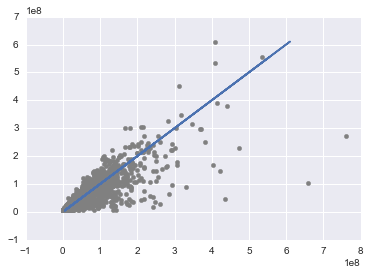

In [226]:
plt.scatter(df.domestic_gross, predicted_gross, color='gray')
plt.plot(predicted_gross, predicted_gross)

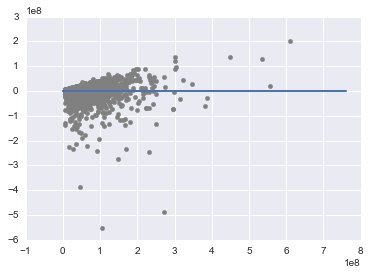

In [229]:
import numpy as np
plt.scatter(predicted_gross, predicted_gross-df.domestic_gross, color='gray')
plt.plot(df.domestic_gross, np.zeros(len(predicted_gross)))


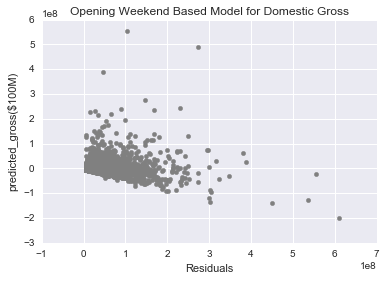